In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
pip install xlrd

In [45]:
df=pd.read_excel(r"C:\Users\Lenovo\OneDrive\Documents\Data set\MLL\Concrete_Data.xls")

In [46]:
df.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [47]:
df.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [48]:
df.shape

(1030, 9)

In [49]:
df.duplicated().sum()

np.int64(25)

In [50]:
df=df.drop_duplicates()

In [51]:
df.isnull().sum()

cement              0
blastFurnace        0
flyAsh              0
water               0
superplasticizer    0
courseAggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

## EDA

Train test split

In [52]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis=1)
y = df["strength"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

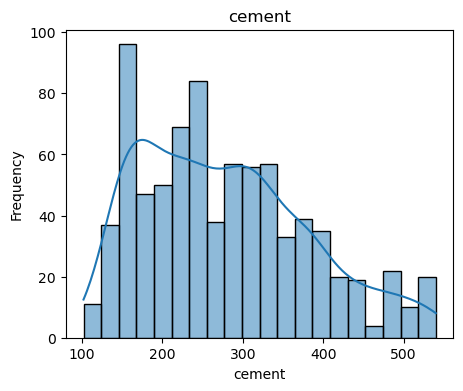

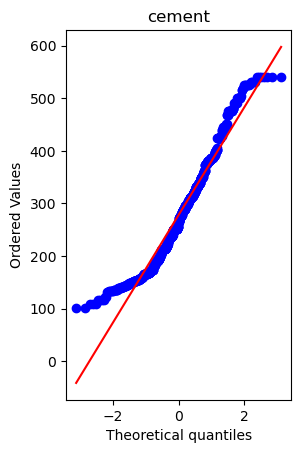

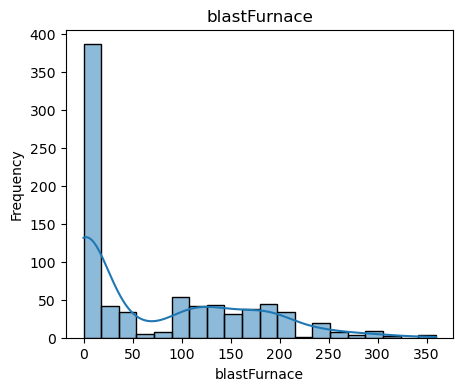

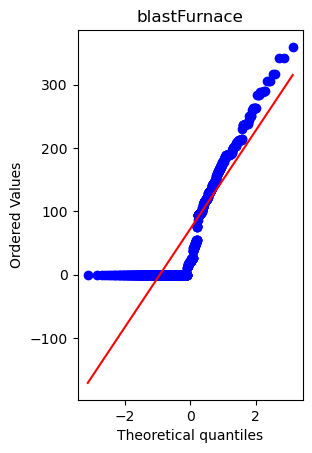

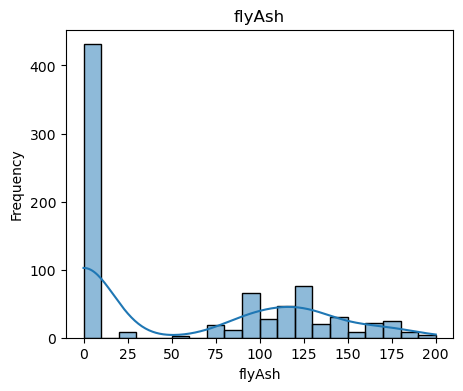

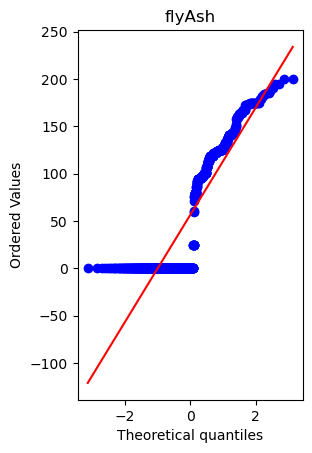

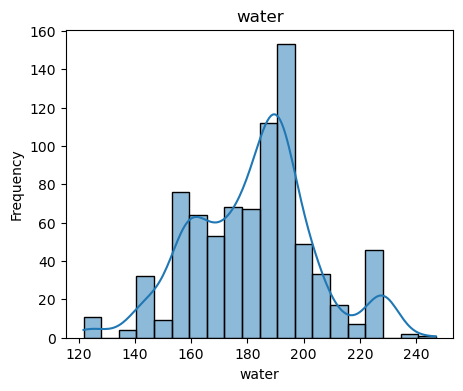

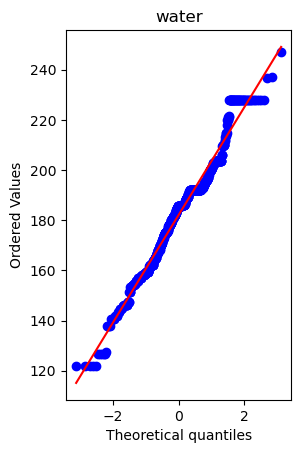

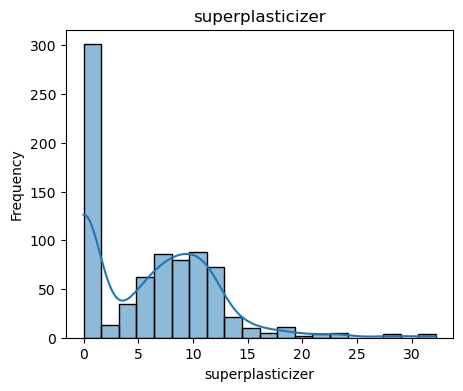

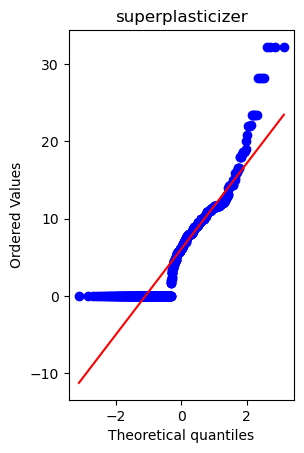

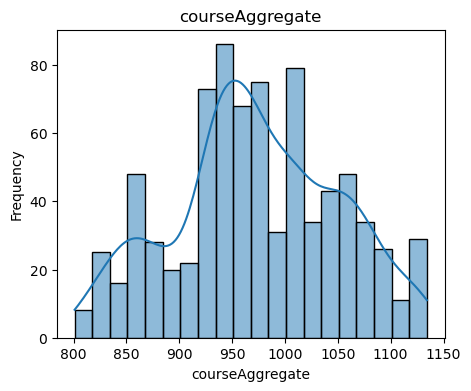

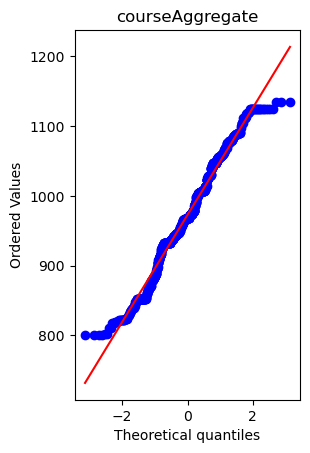

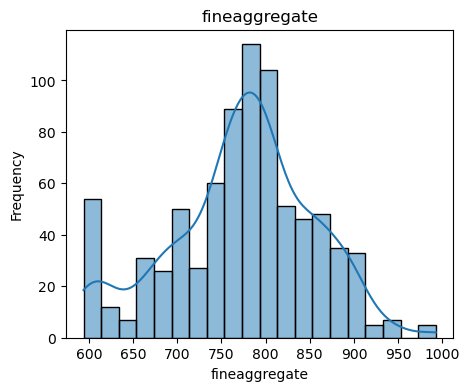

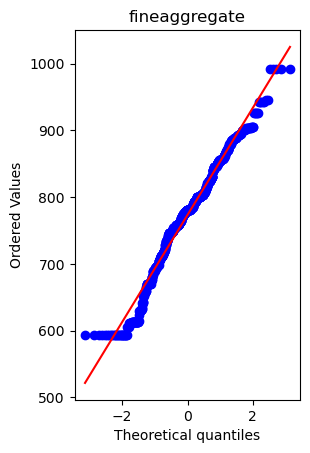

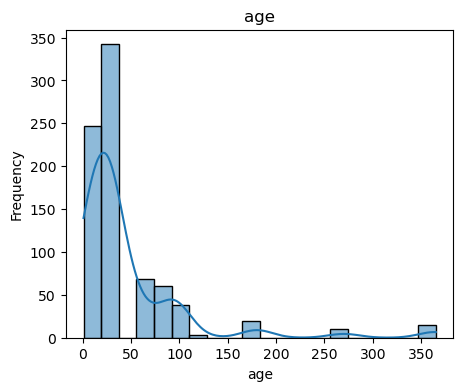

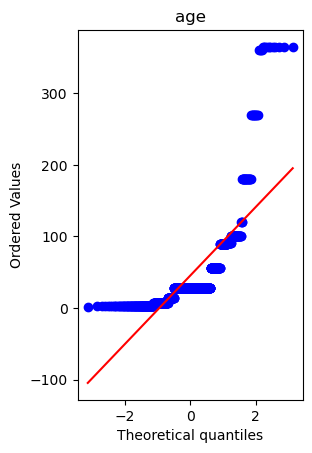

In [53]:
for col in X_train.columns:
    plt.figure(figsize=(5,4))
    # plt.Subplot(1,2,1)
    sns.histplot(X_train[col],kde=True,bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


        # QQ plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()

# Apllying powerTransformer

What is powertransfomer in machine learning?

Ans:

Power transformation is a family of data transformations that are applied to make the data more Gaussian-like or more symmetric. This can be useful for certain statistical methods that assume normally distributed data, such as linear regression.

Types:

Yeo-Johnson & Box-Cox

is a generalization of Box-Cox that allows for transformation of both positive and negative values. PowerTransformer can be used as a preprocessing step in a machine learning pipeline to improve the performance of models that are sensitive to the distribution of the data.

In [31]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [54]:
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.transform(X_test)

In [55]:

# Convert back to DataFrame (keep same column names)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns, index=X_train.index)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns, index=X_test.index)

In [58]:
X_train_transformed


,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age
79,1.945412,-1.046384,-0.927730,-1.880149,2.052836,-1.549306,1.562787,-1.694744
29,1.629286,-1.046384,-0.927730,2.122289,-1.212383,-0.531788,-2.053876,-1.066957
304,0.156531,-1.046384,1.015683,-0.999022,0.996678,0.008870,1.306964,-1.694744
531,1.389877,-1.046384,-0.927730,1.662401,-1.212383,-1.721926,-0.699016,0.105486
676,-1.157874,1.255883,-0.927730,0.993720,-1.212383,0.030905,-1.011070,-1.066957
...,...,...,...,...,...,...,...,...
115,0.689649,1.139008,-0.927730,-0.332193,0.769635,-0.368413,-0.266404,-1.066957
294,-1.126581,0.520204,1.095065,-1.105135,0.903417,1.408922,0.239929,-1.694744
885,-1.374824,1.028804,1.064343,-0.187993,0.602346,-1.360940,0.603382,0.105486
459,-1.185239,0.978649,1.114754,-0.324747,0.611782,0.423612,-0.378486,1.248999


# Again Distribution

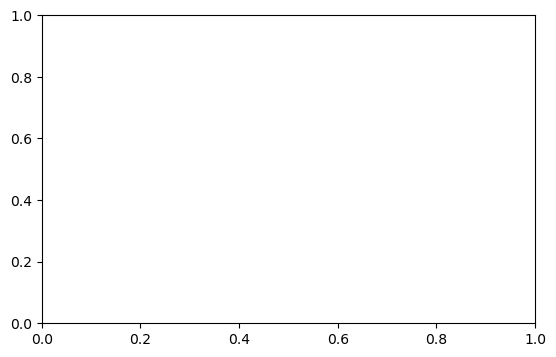

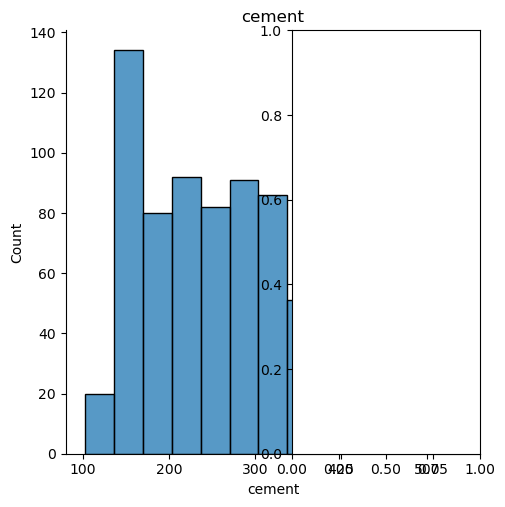

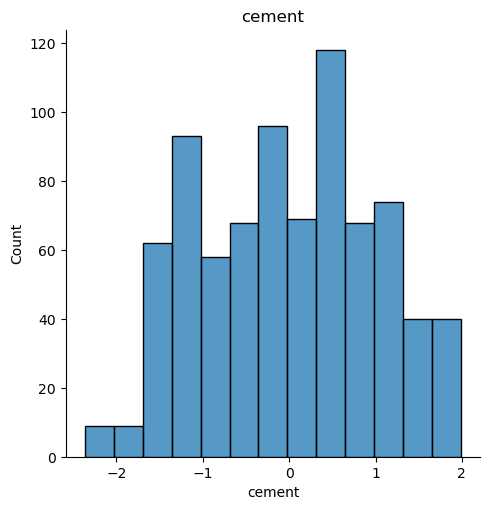

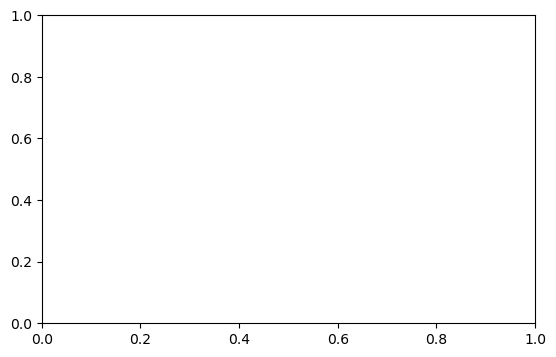

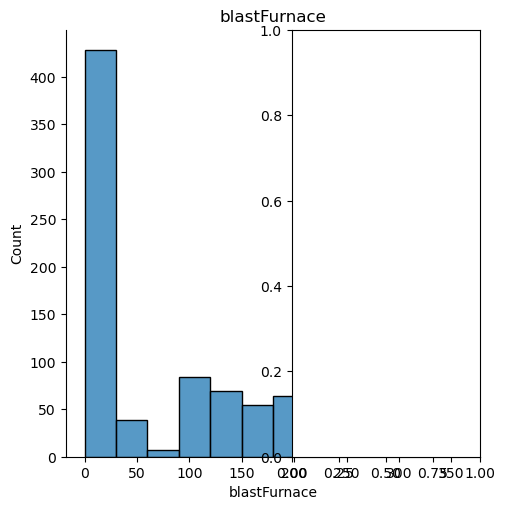

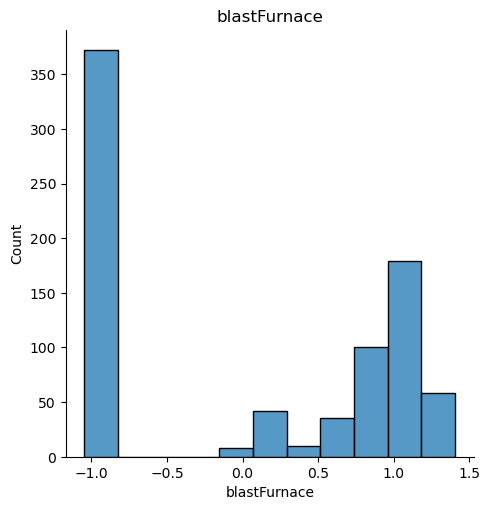

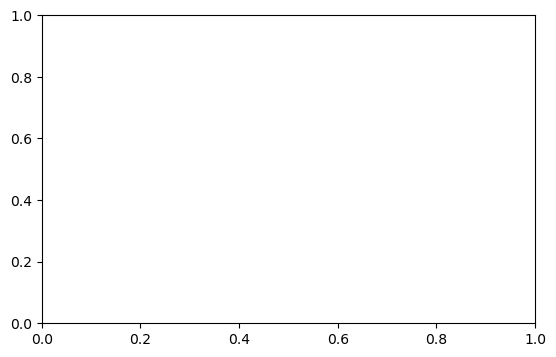

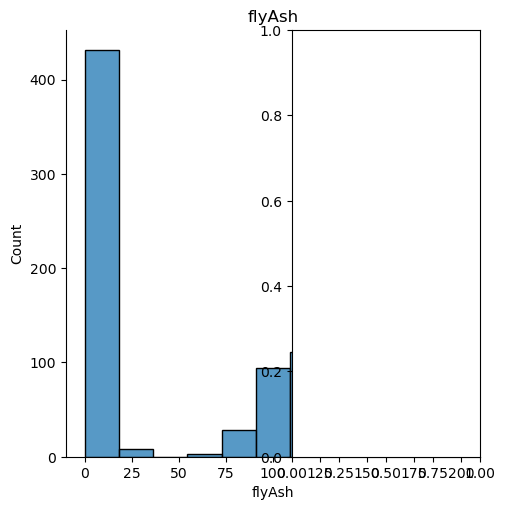

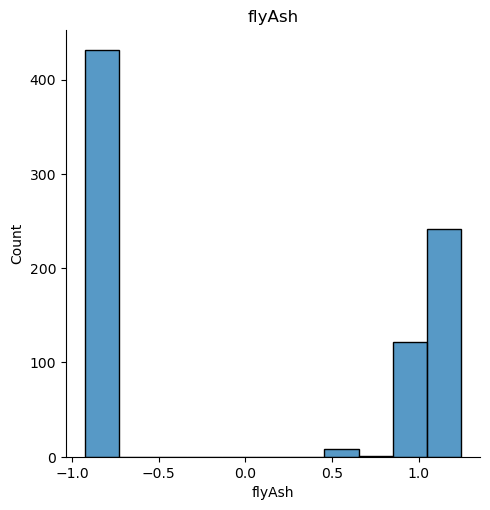

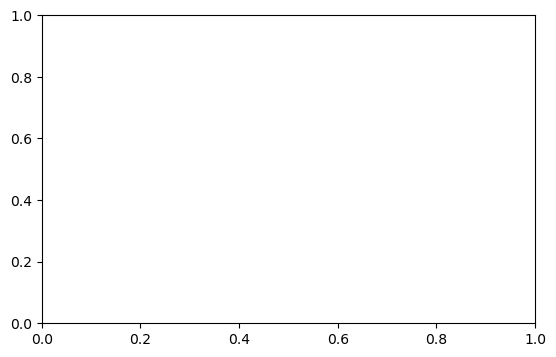

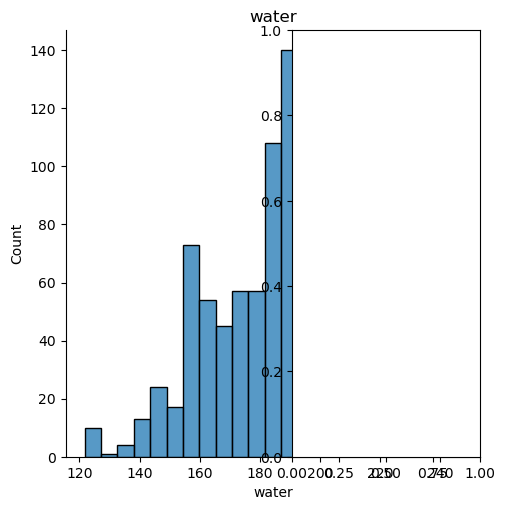

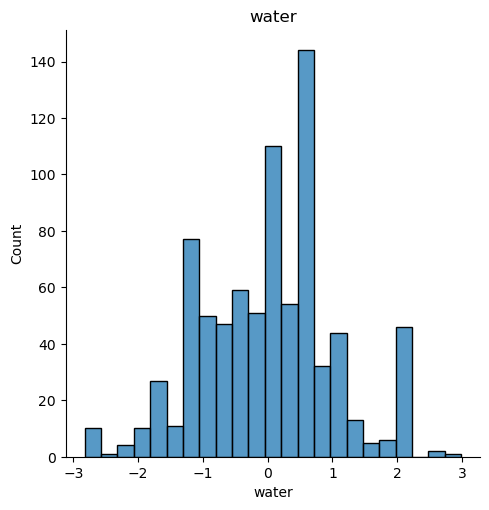

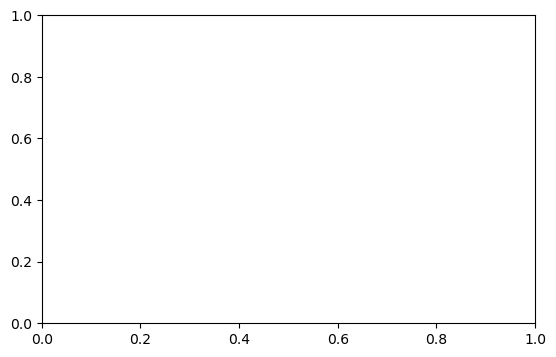

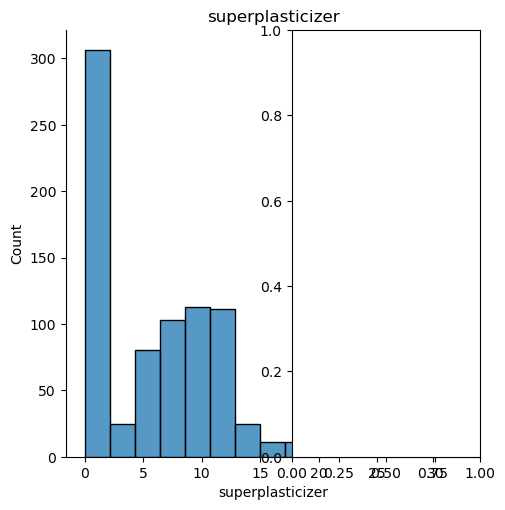

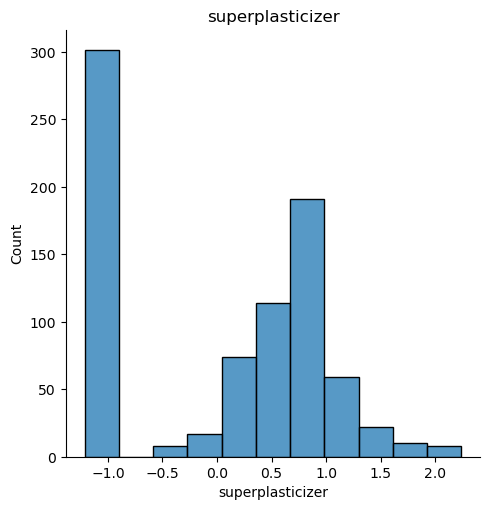

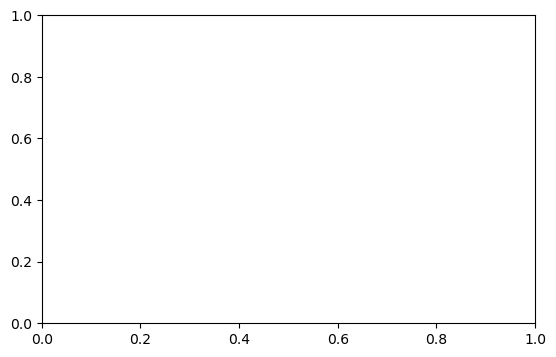

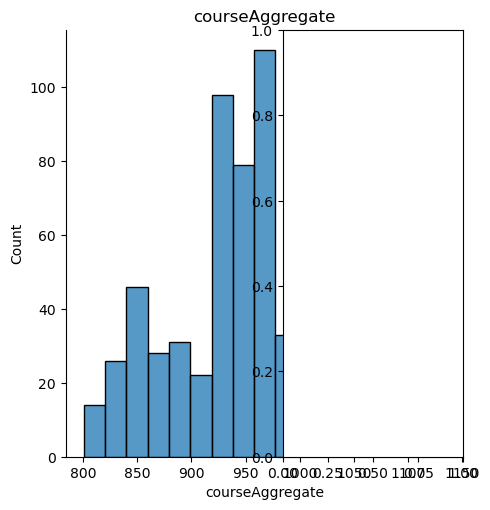

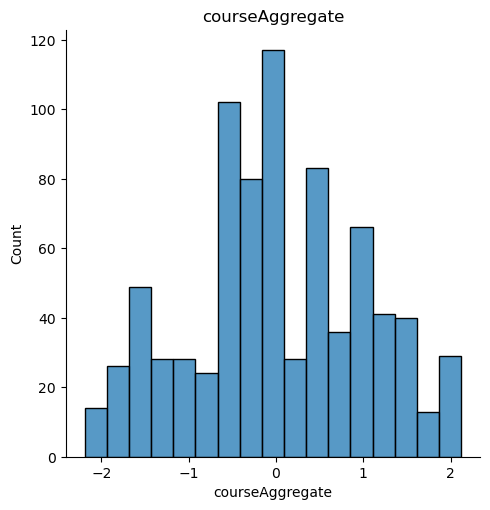

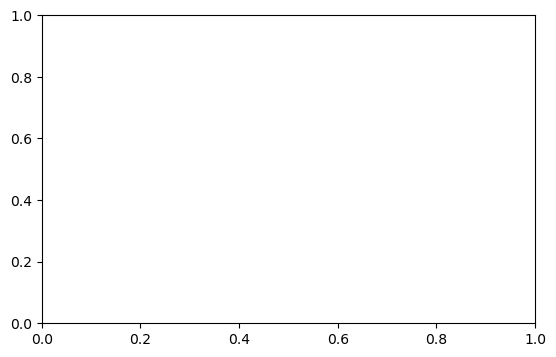

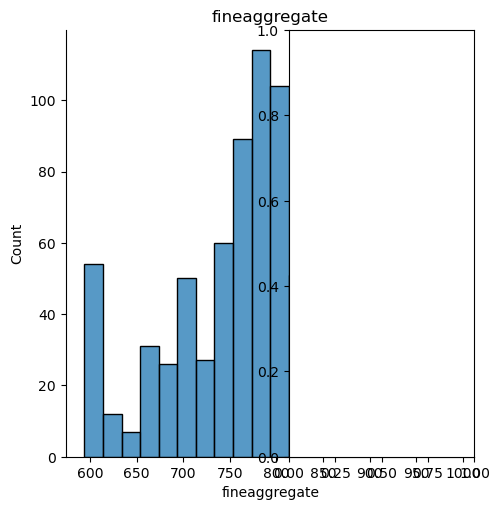

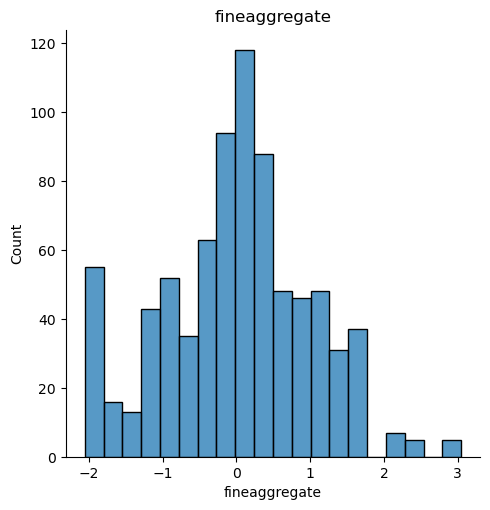

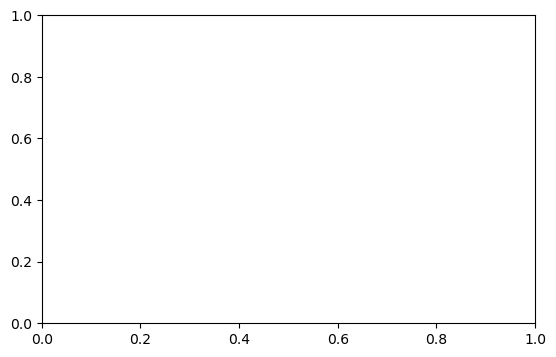

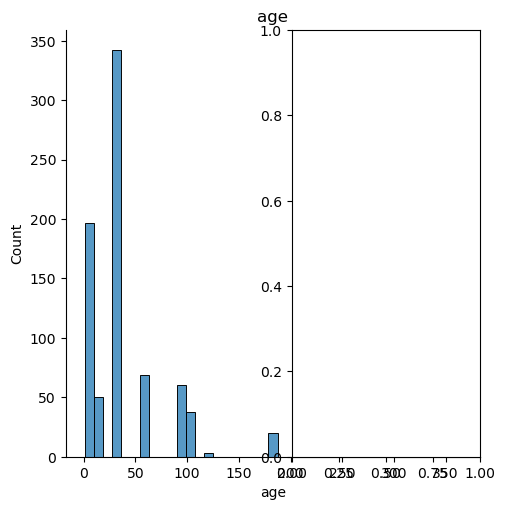

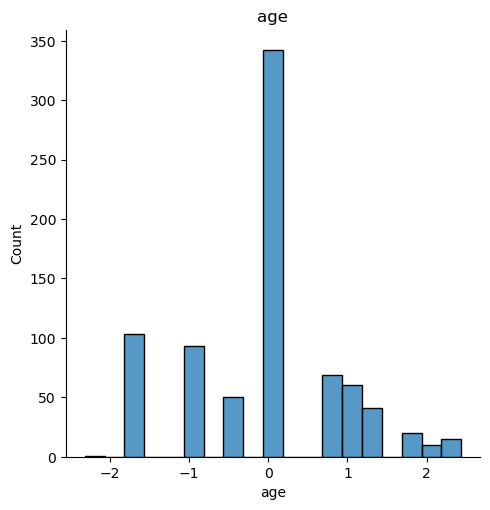

In [57]:
# input_features (input)


for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.displot(X_train[col])
    plt.title(col)
 
    
    
#     # QQ plot
    plt.subplot(122)
    sns.displot(X_train_transformed[col])
    plt.title(col)
    plt.show()

# Scaling (Standarization Scalar)

In [59]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [60]:
X_train_transformed=scalar.fit_transform(X_train_transformed)
X_test_transformed=scalar.transform(X_test_transformed)

# Training Models:

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [69]:
# Define the regression models
models={
    'lin_reg':LinearRegression(),
    'ridge':Ridge(),
    'lasso':Lasso(),
    "DT":DecisionTreeRegressor(),
    'rf_reg': RandomForestRegressor(n_estimators=100,random_state=42),
    'xgb_reb':XGBRegressor(),
}

for name,model in models.items():
    model.fit(X_train_transformed,y_train)
    y_pred=model.predict(X_test_transformed)
    print(f"{name}, r2 score:{r2_score(y_test,y_pred)},mse:{mean_squared_error(y_test,y_pred)}")

lin_reg, r2 score:0.7955207741875179,mse:61.00191100427133
ridge, r2 score:0.7953618616686643,mse:61.04931908347377
lasso, r2 score:0.7545128835776715,mse:73.23571951716544
DT, r2 score:0.8554875308544773,mse:43.11213888254341
rf_reg, r2 score:0.9129793699929659,mse:25.960704350929085
xgb_reb, r2 score:0.9309601468990207,mse:20.59653227793477


## Selecting the best model

In [70]:
xgb=XGBRegressor()
xgb.fit(X_train_transformed,y_train)
y_pred=xgb.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.9309601468990207

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   blastFurnace      1005 non-null   float64
 2   flyAsh            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   courseAggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   strength          1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [72]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))

## Prediction Model

In [73]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)
    
    return prediction[0]

In [74]:
cem = 158.60
blastf = 148.90
flyas = 116.00
water = 175.10
superplaster = 15.00
courseagg = 953.3
fineagg = 719.70
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [48.980663]
